In [92]:
import pandas as pd
import numpy as np
M=10000
data = pd.read_csv('train_2011_2012_2013.csv',delimiter=';',usecols=['DATE','ASS_ASSIGNMENT','CSPL_RECEIVED_CALLS'], nrows=M)
#data = pd.read_csv('train_2011_2012_2013.csv',delimiter=';',usecols=['DATE','ASS_ASSIGNMENT','CSPL_RECEIVED_CALLS'])

In [93]:
d = pd.DataFrame(data.groupby(['DATE', 'ASS_ASSIGNMENT'])['CSPL_RECEIVED_CALLS'].sum())
d.reset_index(level=0, inplace=True)
d.reset_index(level=0, inplace=True)
data = d

In [94]:
import time
data['time'] = data['DATE'].apply(lambda x: time.strptime(x, '%Y-%m-%d %H:%M:%S.000'))
data['day_week'] = data['time'].apply(lambda x: time.strftime("%w", x))
data['month'] = data['time'].apply(lambda x: time.strftime("%m", x))

In [95]:
data['ASS_ASSIGNMENT'].value_counts()

Téléphonie                        155
Services                          155
Japon                             155
Nuit                              155
Tech. Inter                       154
Domicile                          154
Gestion                           154
Médical                           154
RENAULT                           154
Gestion - Accueil Telephonique    153
SAP                               153
Gestion Renault                   150
Crises                            147
Regulation Medicale               141
Tech. Axa                         140
Gestion Assurances                125
Gestion Amex                      125
Tech. Total                       109
Gestion Clients                    85
Manager                            61
Gestion DZ                         53
Gestion Relation Clienteles        47
RTC                                43
Mécanicien                         33
CMS                                13
Prestataires                       10
CAT         

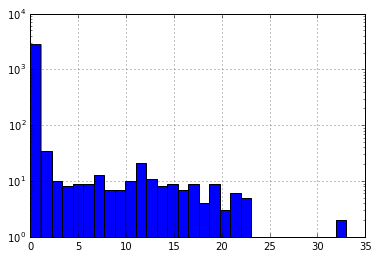

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.yscale('log')
# data['ASS_ASSIGNMENT'] = pd.Series(data['ASS_ASSIGNMENT'],dtype=int)
data['CSPL_RECEIVED_CALLS'].hist(bins=30)

In [97]:
data = pd.concat((data, pd.get_dummies(data['day_week'])),axis=1)
data = pd.concat((data, pd.get_dummies(data['ASS_ASSIGNMENT'])),axis=1)
data = pd.concat((data, pd.get_dummies(data['month'])),axis=1)

In [98]:
data['H-M'] = data['time'].apply(lambda t: time.strftime("%H-%M", t))

In [121]:
data['hours'] = data['time'].apply(lambda x: float(time.strftime("%H", x))+np.sign(float(time.strftime("%M", x)))*0.5)

In [122]:
data['hours'].value_counts()

0.0    2290
0.5     588
1.5     109
Name: hours, dtype: int64

In [99]:
###average calculation
def get_window(x):
    tmp = data[data['ASS_ASSIGNMENT'] == x['ASS_ASSIGNMENT']]
    return tmp[tmp['H-M'] == x['H-M']]['CSPL_RECEIVED_CALLS'].mean()

data['mean_calls_time_ASS'] = data[['H-M','ASS_ASSIGNMENT','CSPL_RECEIVED_CALLS']].apply(get_window,axis=1)

In [100]:
data[['mean_calls_time_ASS', 'DATE','ASS_ASSIGNMENT']]

,mean_calls_time_ASS,DATE,ASS_ASSIGNMENT
0,0.000000,2011-01-01 00:00:00.000,Crises
1,0.116667,2011-01-01 00:00:00.000,Domicile
2,0.000000,2011-01-01 00:00:00.000,Gestion
3,0.000000,2011-01-01 00:00:00.000,Gestion - Accueil Telephonique
4,0.000000,2011-01-01 00:00:00.000,Gestion Amex
5,0.000000,2011-01-01 00:00:00.000,Gestion Assurances
6,0.000000,2011-01-01 00:00:00.000,Gestion Clients
7,0.000000,2011-01-01 00:00:00.000,Gestion Renault
8,0.250000,2011-01-01 00:00:00.000,Japon
9,0.043478,2011-01-01 00:00:00.000,Manager


In [104]:
pp = data[data['H-M']=="00-00"]
pp = pp[pp['ASS_ASSIGNMENT']=="Nuit"]

#pp['CSPL_RECEIVED_CALLS']

In [39]:
#data[['mean_calls_time_ASS', 'DATE', 'ASS_ASSIGNMENT']]

,mean_calls_time_ASS,DATE,ASS_ASSIGNMENT
0,0.000000,2011-01-01 00:00:00.000,Crises
1,0.100000,2011-01-01 00:00:00.000,Domicile
2,0.000000,2011-01-01 00:00:00.000,Gestion
3,0.000000,2011-01-01 00:00:00.000,Gestion - Accueil Telephonique
4,0.000000,2011-01-01 00:00:00.000,Gestion Amex
5,0.000000,2011-01-01 00:00:00.000,Gestion Assurances
6,0.000000,2011-01-01 00:00:00.000,Gestion Clients
7,0.000000,2011-01-01 00:00:00.000,Gestion Renault
8,0.200000,2011-01-01 00:00:00.000,Japon
9,0.000000,2011-01-01 00:00:00.000,Manager


In [103]:
indexes = np.concatenate((data.day_week.unique(), data.ASS_ASSIGNMENT.unique()))
indexes = np.concatenate((data.day_week.unique(), data.ASS_ASSIGNMENT.unique()))

In [133]:
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.cross_validation import train_test_split

X = data[indexes]
Y = data['CSPL_RECEIVED_CALLS']
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [134]:
model = rf()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [135]:
pred = np.round(pred)

In [136]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_score(y_test, pred)
#mean_squared_error(y_test, pred)

1.6000000000000001

In [137]:
#y_test

In [138]:
data_sub = pd.read_table('submission.txt')

In [147]:
data.day_week.unique()

array(['0', '1', '6', '2', '3', '4', '5'], dtype=object)

In [151]:
indexes = np.concatenate((data.day_week.unique(), data.ASS_ASSIGNMENT.unique()))
                     
X_sub = data_sub[indexes]

KeyError: "['Gestion Amex'] not in index"

In [142]:
X_sub

,0,2,3,4,5,6
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0


In [126]:
pred = model.predict(X_sub)
pred = np.round(pred)

ValueError: Number of features of the model must  match the input. Model n_features is 6 and  input n_features is 12 

In [123]:
pred

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [100]:
data_sub = pd.read_table('submission.txt')